## Binary Classification on Cancer Dataset using Keras

### 1. Read the dataset

In [1]:
import pandas as pd

df = pd.read_csv("CANCER.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.shape

(569, 33)

### Dropping the irrelevant columns

In [7]:
df.drop(["id", "Unnamed: 32"], axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Here, the diagnosis column is the target feature on which we have to perform classification.

In [10]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

B stands for Benign and M stands for Malignant. We will have to perform encoding on this feature.

In [11]:
df["diagnosis"].replace({"B":0 , "M":1}, inplace=True)
df["diagnosis"].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

Lets Visualize the number of people having cancer and people not having cancer.

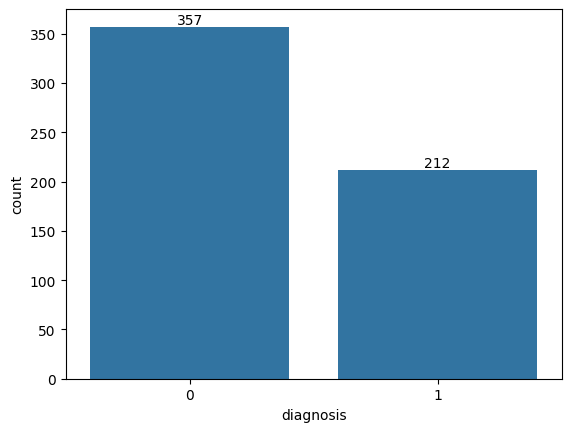

In [13]:
import seaborn as sns
cp = sns.countplot(df, x="diagnosis")

for bars in cp.containers:
    cp.bar_label(bars)

Checking for missing values in the data

In [15]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Seperating X and Y

In [17]:
X = df.drop("diagnosis", axis=1)
Y = df["diagnosis"]

In [18]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

### Preprocessing using Pipelines

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [20]:
num_pipe = Pipeline(steps=[("imputer", SimpleImputer(strategy="mean")),
                           ("scaler", StandardScaler())])

In [22]:
X_pre = num_pipe.fit_transform(X)
X_pre

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [24]:
cols = num_pipe.get_feature_names_out()
cols

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'], dtype=object)

In [25]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### Apply Train Test Split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,test_size=0.2,random_state=42,stratify=Y)

In [28]:
xtrain.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
10,0.537556,0.919273,0.442011,0.406453,-1.017686,-0.713542,-0.700684,-0.404686,-1.035476,-0.826124,...,0.604849,1.335771,0.492622,0.473611,-0.625477,-0.630828,-0.605872,-0.226210,0.076431,0.031819
170,-0.513297,-1.605595,-0.540376,-0.542624,0.458285,-0.654413,-0.614306,-0.307442,0.538081,-0.460382,...,-0.573451,-1.634499,-0.604391,-0.582718,0.268776,-0.812128,-0.709978,-0.315133,-0.119321,-0.899721
407,-0.362769,0.484112,-0.384677,-0.399281,-1.483819,-0.401411,-0.345755,-0.780246,-0.845627,-0.234983,...,-0.387077,0.217034,-0.465589,-0.412728,-1.681045,-0.385914,-0.424046,-0.892221,-0.667748,-0.134983
430,0.219460,0.754052,0.417297,0.085638,0.221305,2.239288,2.316401,1.243034,0.837458,0.876418,...,0.016734,0.308227,0.540279,-0.084174,0.417818,2.892750,3.021056,2.023520,-0.056227,1.748601
27,1.273153,0.223480,1.241101,1.248876,-0.139504,0.042812,0.755818,0.732313,-0.418466,-0.823289,...,1.043864,0.257745,0.972174,0.918363,0.062747,-0.270773,0.347396,0.523700,-0.905562,-0.539518


In [29]:
xtest.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
120,-0.771749,-1.970944,-0.767334,-0.715545,-0.187185,-0.710510,-0.673942,-0.585243,-0.527994,-0.236401,...,-0.714267,-1.580761,-0.700599,-0.650574,0.983301,-0.097107,-0.297391,-0.381064,0.186440,0.071164
250,1.934906,0.993739,1.933096,2.016784,0.308838,1.066192,2.290035,2.117192,1.436213,-0.541186,...,1.928106,0.215406,1.728734,1.985416,-0.493969,0.400354,2.048118,1.460136,0.364396,-0.302339
375,0.580158,-0.749234,0.590295,0.380003,0.173624,0.747807,-0.279842,0.130282,0.651260,0.414279,...,0.145126,-1.064546,0.173913,-0.033546,-0.388763,0.004675,-0.291634,0.159785,0.408076,0.313331
99,0.083133,0.111781,0.103427,-0.035236,0.082532,0.184948,0.063788,0.244291,0.246006,0.156275,...,0.012593,0.843983,0.066684,-0.095249,0.470421,0.307478,0.226498,0.637900,-0.295659,0.531115
455,-0.212241,2.659920,-0.231861,-0.277838,-0.278277,-0.570079,-0.760948,-0.419904,-1.594070,-0.373909,...,-0.252473,2.594554,-0.314872,-0.307605,-0.664929,-0.713526,-0.969860,-0.563022,-1.140140,-0.398762


In [30]:
ytrain.head()

10     1
170    0
407    0
430    1
27     1
Name: diagnosis, dtype: int64

In [31]:
ytest.head()

120    0
250    1
375    0
99     1
455    0
Name: diagnosis, dtype: int64

In [32]:
xtrain.shape

(455, 30)

In [33]:
xtest.shape

(114, 30)

### Creating a neural network using keras

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [35]:
model = Sequential()

# Adding Hidden Layer 1 with input_dim 
model.add(Dense(64, activation = "relu", input_dim = xtrain.shape[1]))
# Adding Dropout Layer 1
model.add(Dropout(0.3))

# Adding Hidden Layer 2
model.add(Dense(32, activation="relu"))
# Adding Dropout Layer 2
model.add(Dropout(0.2))

# Adding Output Layer
model.add(Dense(1, activation="sigmoid"))

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4097 (16.00 KB)
Trainable params: 4097 (16.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compile the model

In [38]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy","AUC"])

### Fit the model

In [39]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=100)

Epoch 1/100
12/12 [==============================] - 2s 38ms/step - loss: 0.4793 - accuracy: 0.7995 - auc: 0.8708 - val_loss: 0.3058 - val_accuracy: 0.9341 - val_auc: 0.9604
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 0.2896 - accuracy: 0.9121 - auc: 0.9751 - val_loss: 0.2337 - val_accuracy: 0.9451 - val_auc: 0.9732
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.2363 - accuracy: 0.9258 - auc: 0.9787 - val_loss: 0.1975 - val_accuracy: 0.9451 - val_auc: 0.9790
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1857 - accuracy: 0.9478 - auc: 0.9860 - val_loss: 0.1741 - val_accuracy: 0.9451 - val_auc: 0.9809
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 0.1601 - accuracy: 0.9560 - auc: 0.9878 - val_loss: 0.1574 - val_accuracy: 0.9451 - val_auc: 0.9822
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1544 - accuracy: 0.9505 - auc: 0.9868 - val_loss: 0.1436 - 

### Plot the learning curve

In [40]:
import matplotlib.pyplot as plt

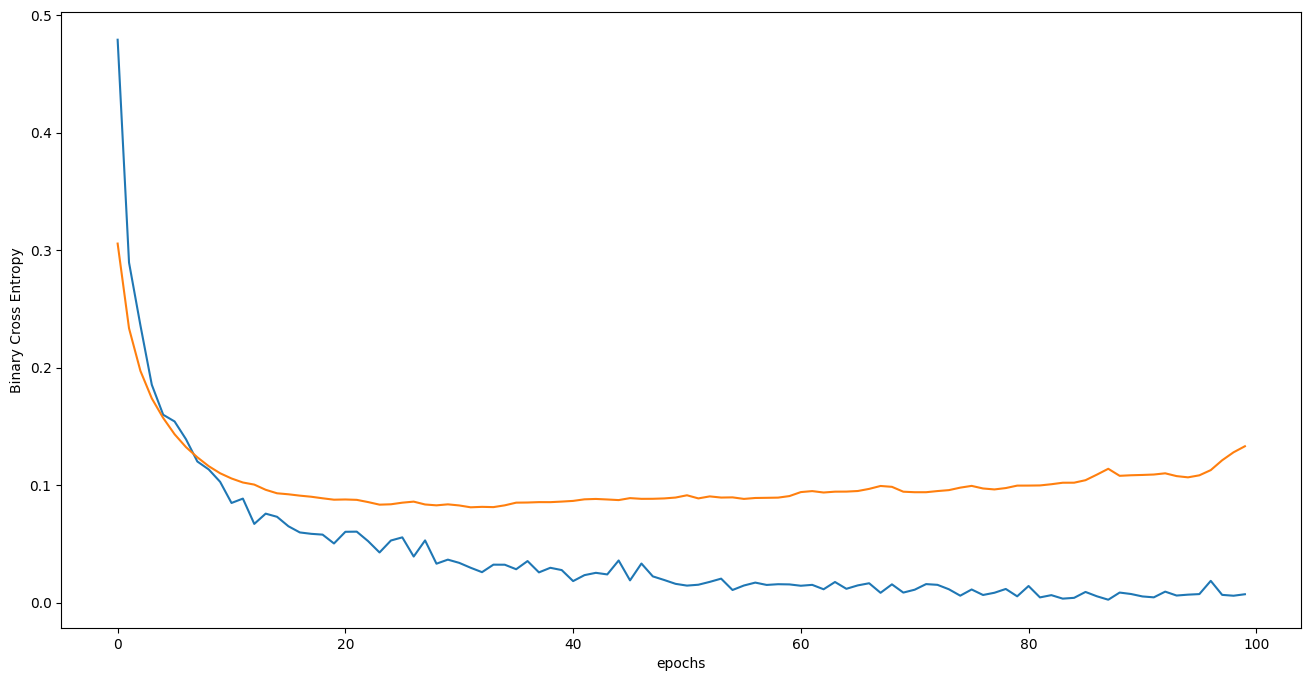

In [41]:
plt.figure(figsize=(16,8))
plt.plot(hist.history["loss"], label="Train BCE")
plt.plot(hist.history["val_loss"], label="Test BCE")
plt.xlabel("epochs")
plt.ylabel("Binary Cross Entropy")
plt.show()

### Evaluating the model on train and test

In [42]:
model.evaluate(xtrain,ytrain)

15/15 [==============================] - 0s 2ms/step - loss: 0.0280 - accuracy: 0.9934 - auc: 0.9967


[0.028027374297380447, 0.9934065937995911, 0.9967079162597656]

In [43]:
model.evaluate(xtest,ytest)

4/4 [==============================] - 0s 5ms/step - loss: 0.0973 - accuracy: 0.9825 - auc: 0.9871


[0.09729570895433426, 0.9824561476707458, 0.9871032238006592]

### Predicting train and test

In [44]:
yprob_tr = model.predict(xtrain)
yprob_ts = model.predict(xtest)

4/4 [==============================] - 0s 2ms/step


In [45]:
yprob_tr[0:5]

array([[9.9747998e-01],
       [2.5919572e-08],
       [3.3392080e-06],
       [1.0000000e+00],
       [1.0000000e+00]], dtype=float32)

In [46]:
yprob_ts[0:5]

array([[1.1854029e-10],
       [1.0000000e+00],
       [1.2464327e-05],
       [9.5482606e-01],
       [1.0085707e-02]], dtype=float32)

### Predicting the results

In [47]:
ypred_tr = [1 if i>0.5 else 0 for i in yprob_tr]
ypred_ts = [1 if i>0.5 else 0 for i in yprob_ts]

In [48]:
ypred_tr[0:5]

[1, 0, 0, 1, 1]

In [49]:
ypred_ts[0:5]

[0, 1, 0, 1, 0]

### Creating confusion matrix for test results

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

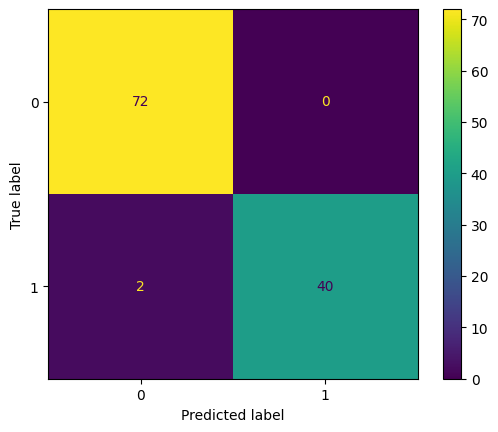

In [54]:
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

### Classification Report

In [55]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



### Save the model for future predictions

In [56]:
model.save("Cancer_dataset_binary_classification.keras")